In [24]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os
import math
import warnings
import itertools
import statsmodels.api as sm
import matplotlib

In [25]:
temp_data = pd.read_csv(r"temp-data-2019.csv")
temp_data.head(12)

,id,room_id,date,temp,outside/inside
0,temp.data_ex09we3091,Admin,10-12-2019 09:30,27,inside
1,temp.data_ex09we3092,Admin,10-12-2019 09:30,27,inside
2,temp.data_ex09we3093,Admin,10-12-2019 09:27,38,outside
3,temp.data_ex09we3094,Admin,10-12-2019 09:27,38,outside
4,temp.data_ex09we3095,Admin,10-12-2019 09:27,38,outside
5,temp.data_ex09we3096,Admin,10-12-2019 09:27,38,outside
6,temp.data_ex09we3097,Admin,10-12-2019 09:28,27,inside
7,temp.data_ex09we3098,Admin,10-12-2019 09:28,27,inside
8,temp.data_ex09we3099,Admin,10-12-2019 09:26,27,inside
9,temp.data_ex09we3100,Admin,10-12-2019 09:26,27,inside


In [26]:
print("Maximum temperature in inside & outside:")
temp_data.groupby("outside/inside").temp.max()

Maximum temperature in inside & outside:


outside/inside
inside     40
outside    51
Name: temp, dtype: int64

In [27]:
from datetime import date ,time,datetime

In [28]:
temp_data["date_time"] = temp_data['date'].apply(lambda x: datetime.strptime(x,'%d-%m-%Y %M:%S'))

In [29]:
temp_data["date"] = pd.to_datetime(temp_data.date).dt.date
temp_data["year"] = pd.to_datetime(temp_data.date).dt.year
temp_data["month"] = pd.to_datetime(temp_data.date).dt.month

In [30]:
temp_data.head(7)

,id,room_id,date,temp,outside/inside,date_time,year,month
0,temp.data_ex09we3091,Admin,2019-10-12,27,inside,2019-12-10 00:09:30,2019,10
1,temp.data_ex09we3092,Admin,2019-10-12,27,inside,2019-12-10 00:09:30,2019,10
2,temp.data_ex09we3093,Admin,2019-10-12,38,outside,2019-12-10 00:09:27,2019,10
3,temp.data_ex09we3094,Admin,2019-10-12,38,outside,2019-12-10 00:09:27,2019,10
4,temp.data_ex09we3095,Admin,2019-10-12,38,outside,2019-12-10 00:09:27,2019,10
5,temp.data_ex09we3096,Admin,2019-10-12,38,outside,2019-12-10 00:09:27,2019,10
6,temp.data_ex09we3097,Admin,2019-10-12,27,inside,2019-12-10 00:09:28,2019,10


In [31]:
temp_data1 = temp_data.groupby('month').temp.agg(['min','max'])
temp_data1['month_1'] = temp_data1.index

In [32]:
print("Month wise min and max temperature:")
temp_data1

Month wise min and max temperature:


,min,max,month_1
month,,,
1,27,48,1
2,30,48,2
3,21,49,3
4,23,49,4
5,24,48,5
6,24,33,6
7,24,43,7
8,25,40,8
9,24,51,9


In [33]:
temp_data6 = pd.merge(left = temp_data,right =temp_data1,how = 'left',left_on = "month" ,right_on = "month_1")
temp_data6.head(7)

,id,room_id,date,temp,outside/inside,date_time,year,month,min,max,month_1
0,temp.data_ex09we3091,Admin,2019-10-12,27,inside,2019-12-10 00:09:30,2019,10,22,50,10
1,temp.data_ex09we3092,Admin,2019-10-12,27,inside,2019-12-10 00:09:30,2019,10,22,50,10
2,temp.data_ex09we3093,Admin,2019-10-12,38,outside,2019-12-10 00:09:27,2019,10,22,50,10
3,temp.data_ex09we3094,Admin,2019-10-12,38,outside,2019-12-10 00:09:27,2019,10,22,50,10
4,temp.data_ex09we3095,Admin,2019-10-12,38,outside,2019-12-10 00:09:27,2019,10,22,50,10
5,temp.data_ex09we3096,Admin,2019-10-12,38,outside,2019-12-10 00:09:27,2019,10,22,50,10
6,temp.data_ex09we3097,Admin,2019-10-12,27,inside,2019-12-10 00:09:28,2019,10,22,50,10


In [34]:
temp_data["unique_id"] = temp_data.index

In [35]:
temp_data2 = temp_data1.drop(['month_1'],axis = 1)
temp_data3 = temp_data.groupby(['outside/inside']).temp.agg(['min','max'])
temp_data4 = temp_data.groupby('outside/inside').unique_id.count()
temp_data5 = temp_data.groupby('month').unique_id.count()

Month wise Minimum and Maximum Temperature:


<AxesSubplot:xlabel='month'>

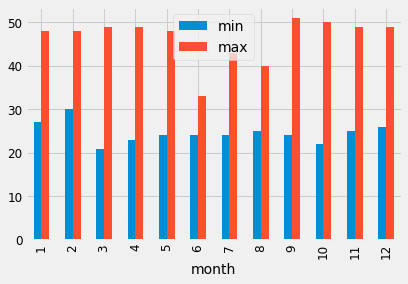

In [36]:
print("Month wise Minimum and Maximum Temperature:")
temp_data2.plot.bar()

Room Inside and Outside Minimum and Maximum Temperature:


<AxesSubplot:xlabel='outside/inside'>

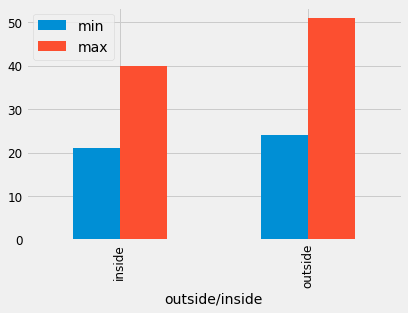

In [37]:
print('Room Inside and Outside Minimum and Maximum Temperature:')
temp_data3.plot.bar()

In [38]:
temp_data7 = temp_data6
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
print("Removing unimportant columns")
temp_data8=temp_data7.drop(['id','room_id','date','outside/inside','date_time','date','year','min','max','month_1'],axis = 1)

Removing unimportant columns


In [39]:
print("Finding Average Temperature Month wise & placing in accending order also assign date to index:")
temp_data8 = temp_data8.groupby(['month']).temp.mean().reset_index()
temp_data8 = temp_data8.assign(date =['2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01'])
temp_data8 = temp_data8.set_index('date')
y = temp_data8.temp
y.head(12)

Finding Average Temperature Month wise & placing in accending order also assign date to index:


date
2019-01-01    38.217172
2019-02-01    38.150400
2019-03-01    32.500328
2019-04-01    32.180564
2019-05-01    39.504732
2019-06-01    27.510204
2019-07-01    32.158189
2019-08-01    31.749770
2019-09-01    33.775509
2019-10-01    36.188059
2019-11-01    33.337759
2019-12-01    30.164179
Name: temp, dtype: float64

Month wise Average Temperature plot:


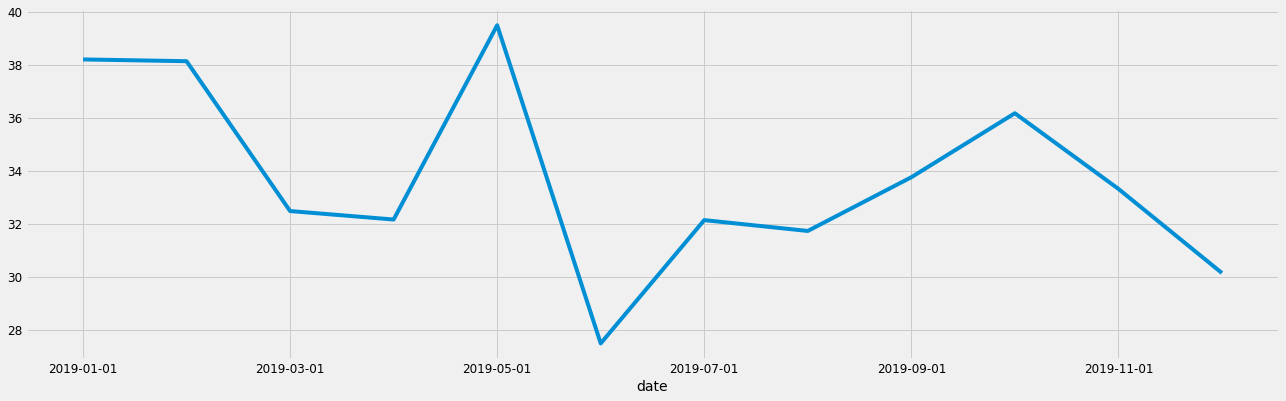

In [40]:
print("Month wise Average Temperature plot:")
y.plot(figsize = (20,6))
plt.show()

In [41]:
a = b = c = range(0,2)
abc = list(itertools.product(a,b,c))
seasonal_abc = [(x[0],x[1],x[2],12) for x in list(itertools.product(a,b,c))]
print('Seasonal ARIMA examples of parameter combination:')
print('SARIMAX: {} x {}'.format(abc[1], seasonal_abc[1]))
print('SARIMAX: {} x {}'.format(abc[1], seasonal_abc[2]))
print('SARIMAX: {} x {}'.format(abc[2], seasonal_abc[3]))
print('SARIMAX: {} x {}'.format(abc[2], seasonal_abc[4]))

print("Selecting best Akaike information criterion(AIC) For Model:")
for param in abc:
    for param_seasonal in seasonal_abc:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order = param,seasonal_order = param_seasonal,enforce_stationarity = False,enforce_invertibility = False)
            result = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,result.aic))
        except:
                continue
print("AIC is 50")

Seasonal ARIMA examples of parameter combination:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
Selecting best Akaike information criterion(AIC) For Model:
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:110.50075983383076
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:92.84697406359413
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:63.68037005083687
ARIMA(0, 1

In [42]:
print("Summary of Model:")
mod=sm.tsa.statespace.SARIMAX(y, order =(1,1,1),
parameter_seasonal = (0,0,0,12),
enforce_invertibility = False,
enforce_stationarity = False)
result=mod.fit()
print(result.summary().tables[1])

Summary of Model:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1101      0.547     -0.201      0.841      -1.182       0.962
ma.L1         -1.0000   1.09e+04  -9.21e-05      1.000   -2.13e+04    2.13e+04
sigma2        11.3304   1.23e+05   9.21e-05      1.000   -2.41e+05    2.41e+05


AttributeError: 'PredictionResults' object has no attribute 'plot'

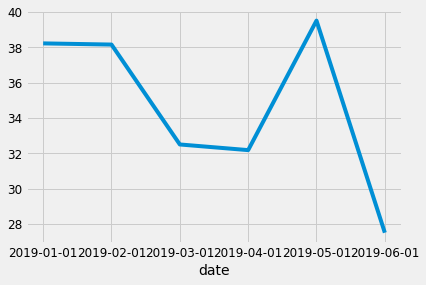

In [43]:
prd = result.get_prediction(start = pd.to_datetime('2019-07-01'),dynamic = False)
predci = prd.conf_int()
ax = y['2019-01-01':'2019-06-01'].plot(label ='observed')
prd.plot(ax = ax,label ='Forecast',alpha= 0.7,figsize = (100,8))
ax.fill_between(predci.index,predci.iloc[:, 0],predci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('temp')
plt.legend
plt.show()

AttributeError: 'PredictionResults' object has no attribute 'plot'

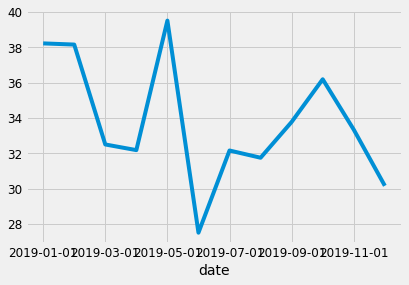

In [44]:
prd = result.get_prediction(start = pd.to_datetime('2019-06-01'),dynamic = False)
predci = prd.conf_int()
ax = y['2019-01-01':].plot(label ='observed')
prd.plot(ax = ax,label ='Forecast',alpha= 0.6,figsize = (50,50))
ax.fill_between(predci.index,predci.iloc[:, 0],predci.iloc[:, 1])
ax.set_xlabel('date')
ax.set_ylabel('temp')
plt.legend
plt.show()

In [45]:
print("Temperature for Predicted and Actual Temperature:")
y_Forecasted = prd.predicted_mean
y_truth = y['2019-08-01':]
actual_pred_table= y_truth.to_frame().join(y_Forecasted.to_frame())
actual_pred_table = actual_pred_table.rename(columns = {"temp":"Actual_value"})
actual_pred_table = actual_pred_table.rename(columns = {0:"Predicted_value"})
actual_pred_table

Temperature for Predicted and Actual Temperature:


,Actual_value,predicted_mean
date,,
2019-08-01,31.749770,33.944752
2019-09-01,33.775509,33.676150
2019-10-01,36.188059,33.465538
2019-11-01,33.337759,33.502421
2019-12-01,30.164179,33.799770


In [46]:
preduc = result.get_forecast(steps=12)
predci = preduc.conf_int()
print("Next 12 month Predicted Average Temperature:")
predci 

Next 12 month Predicted Average Temperature:


,lower temp,upper temp
2020-01-01,26.927903,40.709435
2020-02-01,26.547039,40.285589
2020-03-01,26.584620,40.336606
2020-04-01,26.580429,40.331042
2020-05-01,26.580890,40.331655
2020-06-01,26.580839,40.331588
2020-07-01,26.580845,40.331595
2020-08-01,26.580844,40.331594
2020-09-01,26.580844,40.331595
2020-10-01,26.580844,40.331595


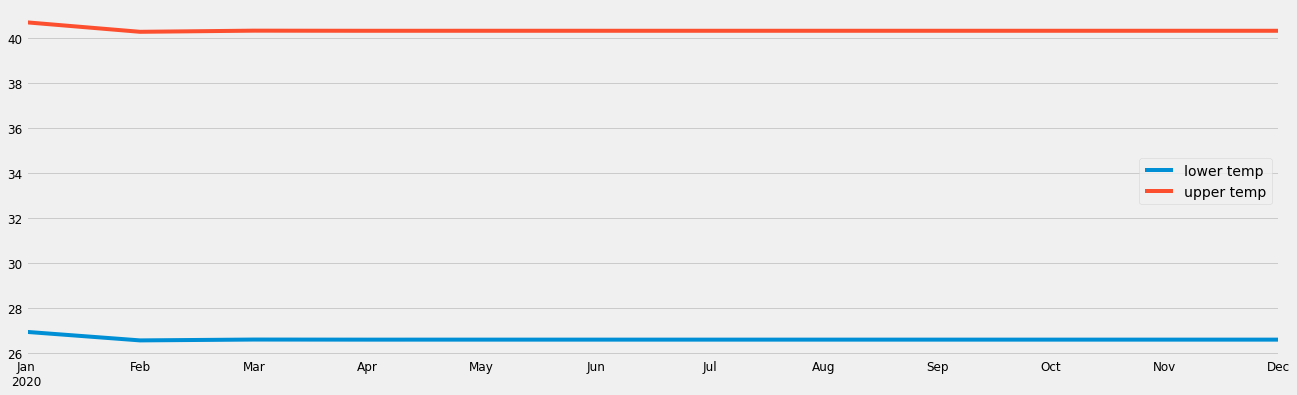

In [47]:
predci.plot(figsize = (20,6))
plt.show()

<AxesSubplot:>

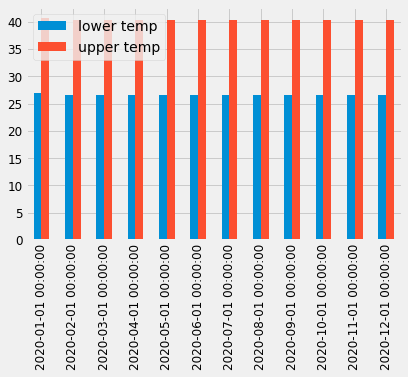

In [48]:
predci.plot.bar()